# Homework Assignment 3

## Topics: OneVsOne/OneVsRest Classifier, multi-classification report

In [2]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-448-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

file_key = 'MarketingData.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## 1. Reading the MarketingData.csv data file and creating a data-frame called marketing_data

marketing_data = pd.read_csv(file_content_stream)

marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [3]:
## 2. Reporting the number of observations in each of the marketing channels

marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

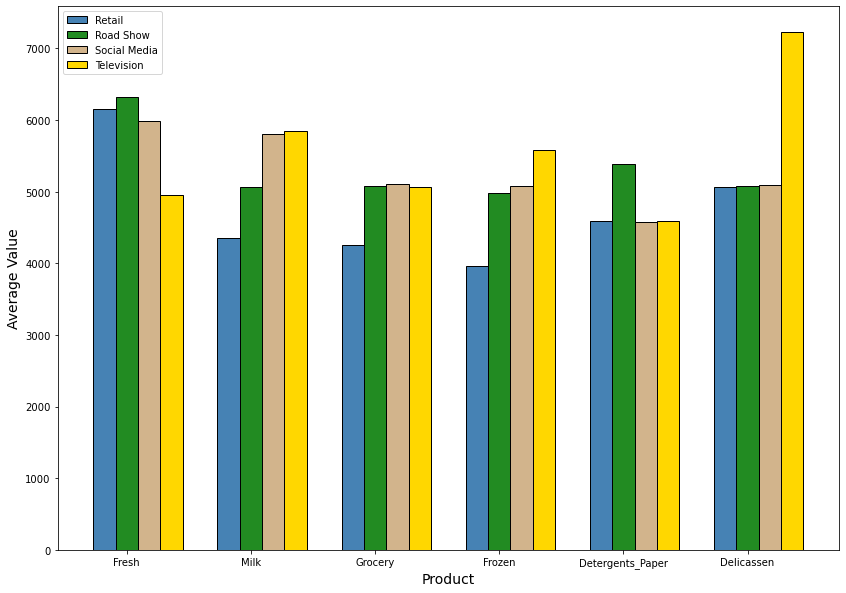

In [4]:
## 3. Creating two visualizations that may show interesting relationships between the input variables and the 
## target variable

## Visualization 1 - grouped bar chart based on product category and marketing channel
groups = marketing_data.groupby('Channel').mean()

barWidth = 0.18
fig = plt.figure(figsize = (14, 10))
 
## Setting heights of bars
bars1 = groups.loc[0]
bars2 = groups.loc[1]
bars3 = groups.loc[2]
bars4 = groups.loc[3]
 
## Setting position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='black', label='Retail')
plt.bar(r2, bars2, color='forestgreen', width=barWidth, edgecolor='black', label='Road Show')
plt.bar(r3, bars3, color='tan', width=barWidth, edgecolor='black', label='Social Media')
plt.bar(r4, bars4, color='gold', width=barWidth, edgecolor='black', label='Television')

plt.xlabel('Product', size = 14)
plt.ylabel('Average Value', size = 14)
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.legend()
plt.show()

## From the visualization, we can see some intersting trends. First, the Television channel has the highest average
## value for three of the six product categories. Next, the Road Show channel is the highest for Fresh products and 
## detergents. The Retail channel had the lowest average values in four categories (milk, grocery, frozen, and
## delicassen). Lastly, the Social Media channel was about in the middle of the pack for each product category
## and leads only the grocery category. 

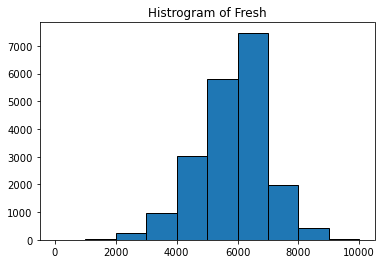

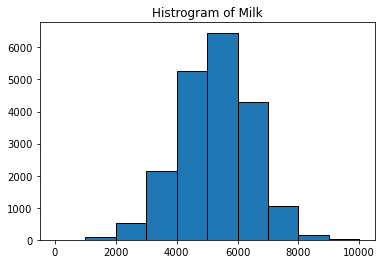

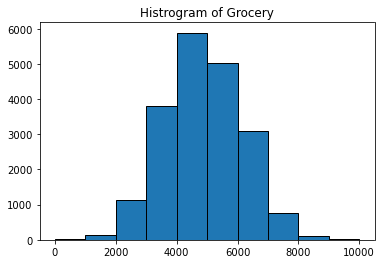

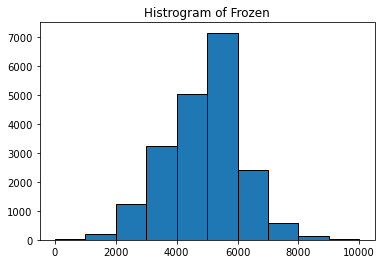

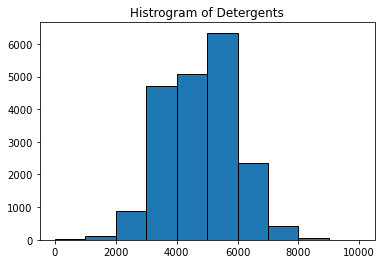

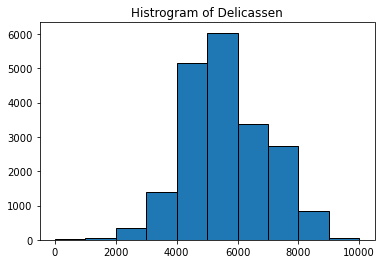

In [5]:
## Visualization 2 - histograms for each product type

plt.hist(marketing_data['Fresh'], edgecolor = 'black')
plt.title('Histrogram of Fresh')
plt.show()

plt.hist(marketing_data['Milk'], edgecolor = 'black')
plt.title('Histrogram of Milk')
plt.show()

plt.hist(marketing_data['Grocery'], edgecolor = 'black')
plt.title('Histrogram of Grocery')
plt.show()

plt.hist(marketing_data['Frozen'], edgecolor = 'black')
plt.title('Histrogram of Frozen')
plt.show()

plt.hist(marketing_data['Detergents_Paper'], edgecolor = 'black')
plt.title('Histrogram of Detergents')
plt.show()

plt.hist(marketing_data['Delicassen'], edgecolor = 'black')
plt.title('Histrogram of Delicassen')
plt.show()

## These visualizations are histograms for each product category. Each product ranges in annual spending 
## from about 1,000 to 10,000. Each somewhat follows a normal distribution and the peak of each product is very 
## similar, except for "Fresh" (slightly higher) and "Grocery" (slightly higher). 

In [6]:
## 4. Splitting the data into two data-frames (taking into account the proportion of 0s, 1s, 2s and 3s in 
## Channel): train (80%) and test (20%)

## Defining the input and target variable
X = marketing_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
Y = marketing_data['Channel']

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [7]:
## i) Using the one-vs-rest strategy to build the multi-class classification model 

## Building the model
md1 = OneVsRestClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 5)).fit(X_train, Y_train)

## Predicting on the test set
md1_preds = md1.predict(X_test)

## Computing the classification report
print(classification_report(Y_test, md1_preds))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1002
           1       0.79      0.70      0.74      1000
           2       0.79      0.83      0.81       998
           3       0.80      0.90      0.85      1000

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000



In [8]:
## ii) Using the one-vs-one strategy to build the multi-class classification model

## Building the model
md2 = OneVsOneClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 5)).fit(X_train, Y_train)

## Predicting on the test set
md2_preds = md2.predict(X_test)

## Computing the classification report
print(classification_report(Y_test, md2_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1002
           1       0.78      0.74      0.76      1000
           2       0.82      0.83      0.82       998
           3       0.80      0.90      0.85      1000

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



In [ ]:
## iii) Based on the results from parts (i) and (ii), we would you use the One Vs One Classifier framework 
## to predict channel. This framework has a slightly higher f1-score for each label and a slightly higher
## overall accuracy. 